# Demo: __`scikit-learn`__
* popular Python library providing efficient implementation of a large number of ML algorithms
* designed to be clean and uniform across tools
* consistent data representation and common interface

# __`scikit-learn`__ Data Representation
<img style="height: 400px;" src="images/scikit-learn-data.png">

* each _observation_ (or _sample_ or _data point_) typically has multiple _features_
  * that's why each sample is represented as a _row_ above
  * each row can, and often does, contain multiple features
* the _target_, however, is one-dimensional, i.e., we are making _one_ prediction (e.g., age, home price, cancer vs. benign, etc.)

## Let's run the "Hello, World!" of Machine Learning
* The "iris" dataset
* Three different species of iris plants: Setosa, Virginica, Versicolour
* Data collected by Ronald Fisher in 1936
  * length and width of the petal and the sepal

![Iris Plant](images/Iris_versicolor_3.jpg)

In [1]:
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

## Above we imported the Python packages we need
* In the case of __`sklearn`__, we need the __`datasets`__ _module_ (a file of Python code) which contains some oft-used datasets

In [2]:
# load the iris dataset that ships with scikit learn
iris = datasets.load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                   columns=iris['feature_names'] + ['target'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Let's plot the sepal length vs. the sepal width

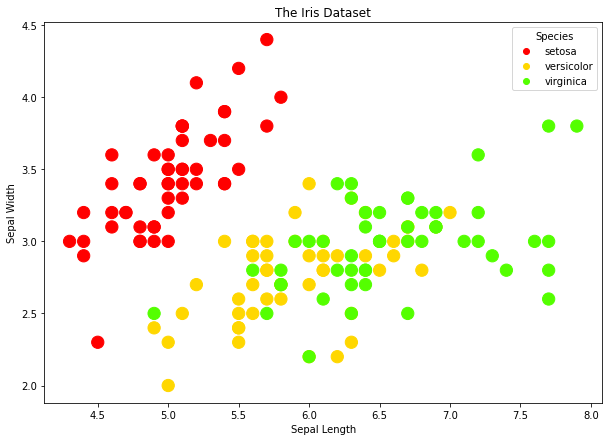

In [3]:
plt.rcParams["figure.figsize"] = (10, 7)
plt.title('The Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
cmap = plt.get_cmap('prism')
norm = plt.Normalize(iris.target.min(), iris.target.max())
handles = [plt.Line2D([0, 0], [0, 0], color=cmap(norm(i)), marker='o', linestyle='', label=label)
           for i, label in enumerate(iris.target_names)]
plt.legend(handles=handles, title='Species', loc='upper right')
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=iris.target, cmap='prism', s=150);

In [4]:
# Set up the feature matrix
X_iris = data.drop('target', axis=1)
X_iris.shape

(150, 4)

In [5]:
# Set up the target vector
y_iris = iris['target']
y_iris.shape

(150,)

# General Workflow
* Choose an algorithm
* Choose hyperparameters (parameters to the algorithm)
* Arrange data into a features matrix (i.e., 2-D) and target vector (1-D)
* Fit the model to the data with the __`fit()`__ method
* Apply the model to test data (__`predict()`__ or __`transform()`__)

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2)

# Let's split out dataset into training and test, in order to 
# see how well our model actually does.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.25, random_state=3)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [7]:
print(X_train.shape, X_test.shape, sep='\n')

(112, 4)
(38, 4)


In [8]:
# Look at our training accuracy
tree_clf.score(X_train, y_train)

0.9642857142857143

In [9]:
tree_clf.score(X_test, y_test)

0.9473684210526315

In [10]:
# Let's check the test data, one by one, and see how
# many we got right.
correct = 0

for i in range(X_test.shape[0]):
    row = np.array(X_test.iloc[i, :])
    pred = tree_clf.predict([row])
    print(f'prediction for {row} is {pred[0]}, actual is {y_test[i]}', end='')
    if pred[0] == y_test[i]:
        correct += 1
    else:
        print('*', end='')
    print()
print(correct / X_test.shape[0])

prediction for [4.6 3.2 1.4 0.2] is 0, actual is 0
prediction for [4.6 3.1 1.5 0.2] is 0, actual is 0
prediction for [5.4 3.4 1.5 0.4] is 0, actual is 0
prediction for [5.  3.  1.6 0.2] is 0, actual is 0
prediction for [5.7 4.4 1.5 0.4] is 0, actual is 0
prediction for [7.7 2.6 6.9 2.3] is 2, actual is 2
prediction for [5.5 2.5 4.  1.3] is 1, actual is 1
prediction for [4.6 3.4 1.4 0.3] is 0, actual is 0
prediction for [6.3 2.9 5.6 1.8] is 2, actual is 2
prediction for [6.7 3.1 4.4 1.4] is 1, actual is 1
prediction for [5.6 3.  4.1 1.3] is 1, actual is 1
prediction for [4.4 3.  1.3 0.2] is 0, actual is 0
prediction for [5.8 2.6 4.  1.2] is 1, actual is 1
prediction for [5.5 2.3 4.  1.3] is 1, actual is 1
prediction for [6.7 3.1 5.6 2.4] is 2, actual is 2
prediction for [5.  3.5 1.3 0.3] is 0, actual is 0
prediction for [6.3 2.5 4.9 1.5] is 1, actual is 1
prediction for [7.7 3.  6.1 2.3] is 2, actual is 2
prediction for [5.7 2.5 5.  2. ] is 2, actual is 2
prediction for [4.4 3.2 1.3 0.2

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: Us